# <center>Causal Discovery in Observsational Time-series Data
## <center>Ameer N.H. Al-Naqib
## <center> Department of Economics, University of Essex
### <center> Code Scripts

* Kindle run the the first two blocks before running other blocks. The first two blocks are to import the relevant packages and data. Some packages like the graphviz package might need to be installed independently before installing in jupyter.

#### Importing Packages

In [59]:
import numpy as np
import pandas as pd
import scipy as sp
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc
import os
import matplotlib.pyplot as mp
import math
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.descriptivestats import describe
from statsmodels.tools.eval_measures import aic
from statsmodels.stats.stattools import robust_skewness
from statsmodels.stats.stattools import robust_kurtosis
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.svar_model import SVAR
from statsmodels.tsa.vector_ar.svar_model import SVARResults
from statsmodels.tsa.api import AutoReg
from statsmodels.tsa.vector_ar.var_model import LagOrderResults
from statsmodels.tsa.vector_ar.vecm import select_order
from sklearn.tree import export_graphviz
from graphviz import Source
import warnings
from lingam.ica_lingam import ICALiNGAM
from lingam.direct_lingam import DirectLiNGAM
from sklearn.decomposition import FastICA
os.environ["PATH"] += os.pathsep + r'/opt/homebrew/bin'

#### Importing data set. Removing NAN values and storing it as a dataframe.

In [45]:
data = ['Final_data.csv']
try:
    p = os.getcwd()
    d = pd.read_csv('{}/{}'.format(p,data[0]))
    df = d.drop(labels = ['Unnamed: 0'], axis = 1)
except:
    path = input('Enter the path where Final_data.csv is saved')
    print(os.getcwd())
    #df = pd.read_csv('{}{}'.format(path,data))

#### Descriptive Statistics

In [46]:
#Basic descriptive statistics

df.describe()

,CrudeOil,HeatingOil,NaturalGas,Copper,Gold,Silver,Bitcoin,Ethereum
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,0.031432,0.021000,0.039995,-0.018556,0.013264,0.089226,-0.216350,-0.179591
std,2.395307,0.720143,0.796615,1.126847,0.832246,1.551195,4.353880,5.450836
min,-15.621248,-2.713297,-3.056784,-4.811925,-5.153256,-6.308724,-19.853695,-23.345986
25%,-1.117991,-0.155977,-0.088066,-0.650424,-0.399817,-0.574329,-2.091522,-2.987729
50%,-0.161644,0.000000,0.000000,0.000000,0.005466,0.067774,-0.211436,-0.135044
75%,0.951553,0.148280,0.260638,0.641371,0.375369,0.609016,1.598181,2.173278
max,30.905068,6.256128,4.963044,7.145896,5.448156,15.359118,50.435392,58.696442


In [47]:
#Skewness

robust_skewness(df)

(array([2.42317772, 1.1778061 , 0.3338704 , 0.39246079, 0.24726572,
        1.70936536, 1.38240241, 1.36944672]),
 array([ 0.07579018, -0.02529537,  0.49489608, -0.00700857, -0.04564148,
        -0.08523395, -0.01909859, -0.10547611]),
 array([ 0.12735156,  0.05180492,  0.08485528, -0.02309286,  0.01377461,
         0.02219656, -0.00171835, -0.0120461 ]),
 array([ 0.08064188,  0.02917345,  0.05022863, -0.01647418,  0.00937364,
         0.01383567, -0.00112911, -0.00817614]))

In [48]:
#Kurtosis

robust_kurtosis(df)

(array([30.52018132,  9.15508095,  4.13676707,  3.32218864,  6.38085453,
        14.28198935, 17.8375336 , 14.20437355]),
 array([ 0.30941768,  2.86823324,  2.94955158, -0.02089422,  0.347298  ,
         0.37123581,  0.44542374,  0.30464475]),
 array([ 0.90736967,  0.01802705, -0.15418199,  0.05590383,  0.81699461,
         1.26498985,  0.93318719,  0.74981317]),
 array([1.29912864, 7.30157447, 7.28610012, 0.67426855, 1.28101425,
        2.61923102, 1.93990832, 1.3667724 ]))

#### Normality tests

In [49]:
#Shapiro-Wilk test

for i in df:
    stats, p = shapiro(df[i])
    print('stats = %.30f, p = %.30f' %(stats, p))
    if p>0.05:
        print('probably gaussian')
    else:
        print('probably non guassian')

stats = 0.826139152050018310546875000000, p = 0.000000000000000000000000000000
probably non guassian
stats = 0.840873777866363525390625000000, p = 0.000000000000000000000000000000
probably non guassian
stats = 0.884687960147857666015625000000, p = 0.000000000000000000000000000421
probably non guassian
stats = 0.960851788520812988281250000000, p = 0.000000000000000085568380062373
probably non guassian
stats = 0.926541566848754882812500000000, p = 0.000000000000000000000052703406
probably non guassian
stats = 0.852846622467041015625000000000, p = 0.000000000000000000000000000000
probably non guassian
stats = 0.893960952758789062500000000000, p = 0.000000000000000000000000004100
probably non guassian
stats = 0.910152792930603027343750000000, p = 0.000000000000000000000000325105
probably non guassian


In [50]:
#Jarque-Bera test

for i in df:
    stats, p = jarque_bera(df[i])
    print('stats = %.30f, p = %.30f' %(stats, p))
    if p>0.05:
        print('probably gaussian')
    else:
        print('probably non guassian')

stats = 44684.573762301588431000709533691406, p = 0.000000000000000000000000000000
probably non guassian
stats = 4181.509963237261217727791517972946, p = 0.000000000000000000000000000000
probably non guassian
stats = 821.601753171499126437993254512548, p = 0.000000000000000000000000000000
probably non guassian
stats = 545.265129878189441114955116063356, p = 0.000000000000000000000000000000
probably non guassian
stats = 1916.580388374871972700930200517178, p = 0.000000000000000000000000000000
probably non guassian
stats = 10091.228373884632674162276089191437, p = 0.000000000000000000000000000000
probably non guassian
stats = 15245.742746468178665963932871818542, p = 0.000000000000000000000000000000
probably non guassian
stats = 9791.893932504945041728205978870392, p = 0.000000000000000000000000000000
probably non guassian


#### Stationarity Tests

In [51]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print('KPSS Statistic: %.20f'%(statistic))
    print('p-value: %.20f'%(p_value))
    print('num lags: %.20f'%(n_lags))
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

for i in df:
    kpss_test(df[i])

KPSS Statistic: 0.15816601710765007538
p-value: 0.10000000000000000555
num lags: 22.00000000000000000000
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.12513582080071444791
p-value: 0.10000000000000000555
num lags: 22.00000000000000000000
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.22487243772192180846
p-value: 0.10000000000000000555
num lags: 22.00000000000000000000
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.11012050185282210024
p-value: 0.10000000000000000555
num lags: 22.00000000000000000000
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.04889918135581013819
p-value: 0.10000000000000000555
num lags: 22.00000000000000000000
Critial Values:
   10% : 0.347
   5% : 0.46

/Users/ameerhussain/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/ameerhussain/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/ameerhussain/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is gr

In [52]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    for i in timeseries:
        dftest = adfuller(timeseries[i], autolag="AIC")
        dfoutput = pd.Series(
            dftest[0:4],
            index=[
                "Test Statistic",
                "p-value",
                "#Lags Used",
                "Number of Observations Used",
            ],
        )
        for key, value in dftest[4].items():
            dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)
adf_test(df)

Results of Dickey-Fuller Test:
Test Statistic                   -5.178321
p-value                           0.000010
#Lags Used                       22.000000
Number of Observations Used    1100.000000
Critical Value (1%)              -3.436309
Critical Value (5%)              -2.864171
Critical Value (10%)             -2.568171
dtype: float64
Test Statistic                   -5.433657
p-value                           0.000003
#Lags Used                       19.000000
Number of Observations Used    1103.000000
Critical Value (1%)              -3.436293
Critical Value (5%)              -2.864164
Critical Value (10%)             -2.568167
dtype: float64
Test Statistic                -6.848884e+00
p-value                        1.714493e-09
#Lags Used                     2.100000e+01
Number of Observations Used    1.101000e+03
Critical Value (1%)           -3.436303e+00
Critical Value (5%)           -2.864169e+00
Critical Value (10%)          -2.568170e+00
dtype: float64
Test Statistic

#### Lag Selection

In [53]:
a = VAR(df)
a.select_order(20).summary()

,AIC,BIC,FPE,HQIC
0,5.765,5.802*,319.0,5.779*
1,5.754*,6.081,315.4*,5.877
2,5.759,6.377,317.2,5.993
3,5.774,6.682,321.9,6.118
4,5.805,7.003,332.1,6.258
5,5.773,7.261,321.5,6.336
6,5.785,7.564,325.4,6.458
7,5.827,7.896,339.5,6.609
8,5.857,8.217,349.9,6.749
9,5.864,8.514,352.6,6.866


#### VAR analysis

In [54]:
model = VAR(df)
results = model.fit()
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Oct, 2021
Time:                     20:05:22
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    6.10301
Nobs:                     1122.00    HQIC:                   5.90251
Log likelihood:          -15907.4    FPE:                    323.982
AIC:                      5.78069    Det(Omega_mle):         303.923
--------------------------------------------------------------------
Results for equation CrudeOil
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.005890         0.070977            0.083           0.934
L1.CrudeOil           0.077291         0.029802            2.594           0.010
L1.HeatingOil         0.211529         0.150051          

#### Applying the ICA based VAR-LiNGAM and printing DAG

In [87]:
model = lingam.VARLiNGAM(lingam_model = ICALiNGAM())
result = model.fit(df)
labels = ['CrudeOil(t)','HeatingOil(t)','NaturalGas(t)','Copper(t)','Gold(t)','Silver(t)', 'Bitcoin(t)', 'Ethereum(t)',
          'CrudeOil(t-1)','HeatingOil(t-1)','NaturalGas(t-1)','Copper(t-1)','Gold(t-1)','Silver(t-1)', 'Bitcoin(t-1)', 'Ethereum(t-1)']
g = make_dot(np.hstack(result.adjacency_matrices_), ignore_shape = True, lower_limit = 0.05, labels = labels)
len(result.adjacency_matrices_)

2

#### Applying the VAR - DirectLiNGAM and printing DAG

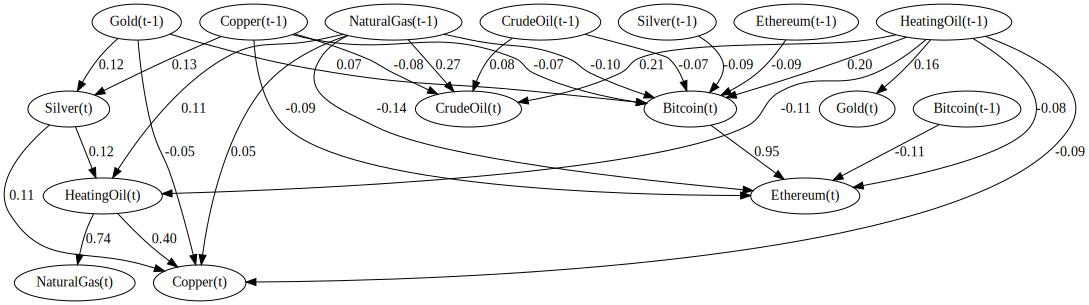

In [93]:
model = lingam.VARLiNGAM(lingam_model = DirectLiNGAM())
result = model.fit(df)
labels = ['CrudeOil(t)','HeatingOil(t)','NaturalGas(t)','Copper(t)','Gold(t)','Silver(t)', 'Bitcoin(t)', 'Ethereum(t)',
          'CrudeOil(t-1)','HeatingOil(t-1)','NaturalGas(t-1)','Copper(t-1)','Gold(t-1)','Silver(t-1)', 'Bitcoin(t-1)', 'Ethereum(t-1)']
g = make_dot(np.hstack(result.adjacency_matrices_), ignore_shape = True, lower_limit = 0.05, labels = labels)
g

#### In case there are problems download and import graphviz package the code here can be run to see the parameters in matrix form
* First run the first two line of the block. i.e the first two lines of DirectLiNGAM block if thats being considered. Then run the code below.
* Here the first matrix represents the contemporaneous effects and the second matrix denotes lagged effects.
* please also note in the code above, the lower limit is set to 0.05, therefore any edges smalled than this have been pruned.

In [92]:
np.around(result.adjacency_matrices_,3)

array([[[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.034,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.772,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.487,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.468,  0.   ,  0.215,  0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.932,  0.   ]],

       [[ 0.077,  0.211,  0.274, -0.077, -0.038,  0.049, -0.041,  0.024],
        [ 0.015, -0.11 ,  0.103, -0.016,  0.049,  0.023, -0.004,  0.005],
        [-0.011, -0.025,  0.003,  0.041,  0.031,  0.004,  0.003, -0.003],
        [-0.019, -0.08 ,  0.043, -0.022, -0.041,  0.012, -0.004,  0.007],
        [ 0.01 ,  0.164, -0.027,  0.011, -0.005, -0.009, -0.006,  0.004],
        [ 0.001,  0.091, -0.093,  0.

#### Checking residuals for independence

In [65]:
np.round(model.get_error_independence_p_values(),4)

array([[0.    , 0.    , 0.0228, 0.609 , 0.4088, 0.7736, 0.4211, 0.0077],
       [0.    , 0.    , 0.    , 0.2826, 0.6354, 0.    , 0.7442, 0.7707],
       [0.0228, 0.    , 0.    , 0.4261, 0.5004, 0.    , 0.5879, 0.431 ],
       [0.609 , 0.2826, 0.4261, 0.    , 0.2878, 0.0156, 0.6471, 0.4735],
       [0.4088, 0.6354, 0.5004, 0.2878, 0.    , 0.3366, 0.006 , 0.2604],
       [0.7736, 0.    , 0.    , 0.0156, 0.3366, 0.    , 0.7017, 0.8848],
       [0.4211, 0.7442, 0.5879, 0.6471, 0.006 , 0.7017, 0.    , 0.    ],
       [0.0077, 0.7707, 0.431 , 0.4735, 0.2604, 0.8848, 0.    , 0.    ]])

#### Bootstrap analysis on ICA based VAR-LiNGAM

In [66]:
model = lingam.VARLiNGAM(lingam_model = ICALiNGAM())
result = model.bootstrap(df,100)
cdc = result.get_causal_direction_counts(n_directions= 20, min_causal_effect=0.05, split_by_causal_effect_sign=True)
print_causal_directions(cdc, 100, labels = labels)

Silver(t) <--- HeatingOil(t) (b>0) (100.0%)
Bitcoin(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Copper(t) <--- HeatingOil(t-1) (b<0) (100.0%)
Ethereum(t) <--- Bitcoin(t-1) (b<0) (100.0%)
Silver(t) <--- Copper(t-1) (b>0) (100.0%)
Silver(t) <--- NaturalGas(t-1) (b<0) (100.0%)
Silver(t) <--- Gold(t-1) (b>0) (100.0%)
CrudeOil(t) <--- Copper(t-1) (b<0) (100.0%)
Bitcoin(t) <--- Ethereum(t-1) (b<0) (100.0%)
CrudeOil(t) <--- HeatingOil(t-1) (b>0) (100.0%)
CrudeOil(t) <--- CrudeOil(t-1) (b>0) (100.0%)
Silver(t) <--- Copper(t) (b>0) (100.0%)
Ethereum(t) <--- NaturalGas(t-1) (b<0) (100.0%)
Ethereum(t) <--- Copper(t-1) (b<0) (100.0%)
Gold(t) <--- HeatingOil(t-1) (b>0) (100.0%)
CrudeOil(t) <--- NaturalGas(t-1) (b>0) (100.0%)
Copper(t) <--- HeatingOil(t) (b>0) (100.0%)
Silver(t) <--- HeatingOil(t-1) (b>0) (99.0%)
HeatingOil(t) <--- NaturalGas(t-1) (b>0) (91.0%)
HeatingOil(t) <--- HeatingOil(t-1) (b<0) (86.0%)


#### Bootstrap analysis on VAR-DirectLiNGAM

In [67]:
model = lingam.VARLiNGAM(lingam_model = DirectLiNGAM())
result = model.bootstrap(df,100)
cdc = result.get_causal_direction_counts(n_directions= 20, min_causal_effect=0.05, split_by_causal_effect_sign=True)
print_causal_directions(cdc, 100, labels = labels)

Silver(t) <--- Copper(t-1) (b>0) (100.0%)
Copper(t) <--- HeatingOil(t-1) (b<0) (100.0%)
Ethereum(t) <--- Bitcoin(t-1) (b<0) (100.0%)
Ethereum(t) <--- Copper(t-1) (b<0) (100.0%)
Ethereum(t) <--- NaturalGas(t-1) (b<0) (100.0%)
CrudeOil(t) <--- CrudeOil(t-1) (b>0) (100.0%)
CrudeOil(t) <--- HeatingOil(t-1) (b>0) (100.0%)
CrudeOil(t) <--- NaturalGas(t-1) (b>0) (100.0%)
CrudeOil(t) <--- Copper(t-1) (b<0) (100.0%)
Silver(t) <--- Gold(t-1) (b>0) (100.0%)
Bitcoin(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Bitcoin(t) <--- Ethereum(t-1) (b<0) (100.0%)
Gold(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Copper(t) <--- HeatingOil(t) (b>0) (99.0%)
HeatingOil(t) <--- NaturalGas(t-1) (b>0) (98.0%)
Copper(t) <--- Silver(t) (b>0) (81.0%)
HeatingOil(t) <--- HeatingOil(t-1) (b<0) (75.0%)
NaturalGas(t) <--- HeatingOil(t) (b>0) (74.0%)
Copper(t) <--- NaturalGas(t-1) (b>0) (69.0%)
HeatingOil(t) <--- Silver(t) (b>0) (64.0%)


### Further bootstap analysis to get all 100 results

In [94]:
#ICA based VAR-LiNGAM

model = lingam.VARLiNGAM(lingam_model = ICALiNGAM())
result = model.bootstrap(df,100)
cdc = result.get_causal_direction_counts(n_directions= 100, min_causal_effect=0.05, split_by_causal_effect_sign=True)
print_causal_directions(cdc, 100, labels = labels)

Copper(t) <--- HeatingOil(t-1) (b<0) (100.0%)
Gold(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Ethereum(t) <--- Bitcoin(t-1) (b<0) (100.0%)
Ethereum(t) <--- NaturalGas(t-1) (b<0) (100.0%)
Silver(t) <--- Gold(t-1) (b>0) (100.0%)
Bitcoin(t) <--- Ethereum(t-1) (b<0) (100.0%)
CrudeOil(t) <--- NaturalGas(t-1) (b>0) (100.0%)
Silver(t) <--- Copper(t-1) (b>0) (100.0%)
CrudeOil(t) <--- CrudeOil(t-1) (b>0) (100.0%)
Ethereum(t) <--- Copper(t-1) (b<0) (100.0%)
Bitcoin(t) <--- HeatingOil(t-1) (b>0) (100.0%)
CrudeOil(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Copper(t) <--- HeatingOil(t) (b>0) (100.0%)
CrudeOil(t) <--- Copper(t-1) (b<0) (99.0%)
Silver(t) <--- NaturalGas(t-1) (b<0) (99.0%)
Silver(t) <--- HeatingOil(t) (b>0) (99.0%)
Silver(t) <--- HeatingOil(t-1) (b>0) (97.0%)
Silver(t) <--- Copper(t) (b>0) (97.0%)
HeatingOil(t) <--- NaturalGas(t-1) (b>0) (87.0%)
Bitcoin(t) <--- Silver(t-1) (b<0) (78.0%)
Bitcoin(t) <--- NaturalGas(t-1) (b<0) (78.0%)
Bitcoin(t) <--- CrudeOil(t-1) (b<0) (78.0%)
Ethereum(t) <--- 

In [95]:
#VAR-DirectLiNGAM

model = lingam.VARLiNGAM(lingam_model = DirectLiNGAM())
result = model.bootstrap(df,100)
cdc = result.get_causal_direction_counts(n_directions= 100, min_causal_effect=0.05, split_by_causal_effect_sign=True)
print_causal_directions(cdc, 100, labels = labels)

Silver(t) <--- Copper(t-1) (b>0) (100.0%)
Bitcoin(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Gold(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Ethereum(t) <--- Bitcoin(t-1) (b<0) (100.0%)
Copper(t) <--- HeatingOil(t-1) (b<0) (100.0%)
Bitcoin(t) <--- Ethereum(t-1) (b<0) (100.0%)
Ethereum(t) <--- NaturalGas(t-1) (b<0) (100.0%)
CrudeOil(t) <--- Copper(t-1) (b<0) (100.0%)
Silver(t) <--- Gold(t-1) (b>0) (100.0%)
CrudeOil(t) <--- HeatingOil(t-1) (b>0) (100.0%)
Ethereum(t) <--- Copper(t-1) (b<0) (100.0%)
CrudeOil(t) <--- NaturalGas(t-1) (b>0) (100.0%)
CrudeOil(t) <--- CrudeOil(t-1) (b>0) (100.0%)
HeatingOil(t) <--- NaturalGas(t-1) (b>0) (97.0%)
Copper(t) <--- HeatingOil(t) (b>0) (96.0%)
Copper(t) <--- Silver(t) (b>0) (76.0%)
HeatingOil(t) <--- HeatingOil(t-1) (b<0) (76.0%)
NaturalGas(t) <--- HeatingOil(t) (b>0) (74.0%)
Bitcoin(t) <--- Silver(t-1) (b<0) (66.0%)
Bitcoin(t) <--- Copper(t-1) (b<0) (66.0%)
Bitcoin(t) <--- NaturalGas(t-1) (b<0) (66.0%)
Bitcoin(t) <--- CrudeOil(t-1) (b<0) (66.0%)
Ethereum(t) 

#### Other code related to data cleaning and exporting a custom data set
##### *This code is not meant to be run

In [ ]:
#Importing and concatinating from different data sets

data_list = ['PriceHistory_CrudeOil', 'PriceHistory_HeatingOil', 'PriceHistory_NaturalGas', 'PriceHistory_Copper', 'PriceHistory_Gold', 
             'PriceHistory_Silver','PriceHistory_Bitcoin','PriceHistory_Ethereum']
data = {}
for i in data_list:
    download = pd.read_csv('Commodity Data/{}.csv'.format(i))
    d = download.dropna()
    df_returns = (np.log(d['Open']) - np.log(d['Close']))*100
    split = i.split('_')
    data['{}'.format(split[1])] = df_returns
df = pd.DataFrame(data).dropna().reset_index().drop('index',axis = 1)
df.to_csv('Final_data.csv')

In [ ]:
#Cleaning data set. Certain values tha had a ',' in them and therefore were getting identified as strings in python
gold = pd.read_csv('Commodity Data/PriceHistory_Gold.csv')
g = gold.dropna()
new = []
for i in g['Open']:
    if type(i) == str:
        s = i.split(',')
        c = s[0] + s[1]
        new.append(float(c))
    else:
        new.append(i)
new1 = []
for i in g['Close']:
    if type(i) == str:
        s = i.split(',')
        c = s[0] + s[1]
        new1.append(float(c))
    else:
        new1.append(i)
gold_final = pd.DataFrame({'Open' : new, 'Close' : new1})